In [1]:
import sys
sys.path.append('src/')
from DataHandler import split
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('dataset/wine_dataset.csv')

In [3]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,k_value,l_value,m_value,percentage_free_sulphur,n_value
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.095093,0.994828,0.994828,0.184518,0.029710,0.177790
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.321441,-0.156621,-0.156621,-0.215364,0.053302,-0.044542
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.159129,0.628252,0.628252,0.326059,0.067317,0.241498
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,-0.002160,0.117474,0.117474,0.018509,0.050021,0.993575
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.109494,0.102184,0.102184,0.572840,0.081575,0.127109
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.061757,-0.158242,-0.158242,0.046965,-0.217280,0.177675
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.231963,-0.107607,-0.107607,0.049530,0.331133,0.204262
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.159110,0.684886,0.684886,0.180272,0.138697,0.391108
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.003264,-0.673141,-0.673141,-0.238552,-0.108620,-0.146948
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.218072,0.159560,0.159560,0.973757,0.055982,0.053761


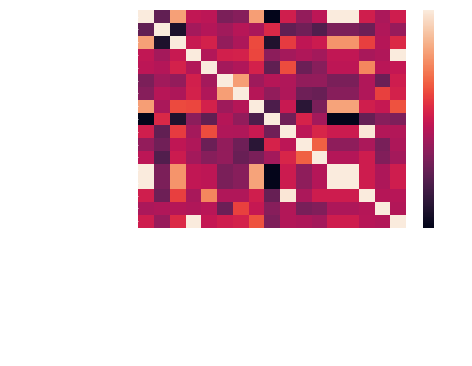

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
plt.style.use('dark_background')
sns.heatmap(df.corr())
plt.show()

I'm using preprocessing the data in two ways
1. PCA
2. removing the l, m value

The first one if for logistic regression and knn, PCA handles the correlation between two or more features on it's own. But it isn't recommended for tree methods, for the reasons of loss in explanability.

In [5]:
data_1 = df.to_numpy()
df.drop(['l_value','m_value'], inplace = True, axis = 1)
data_2 = df.to_numpy()

In [6]:
x1, y = data_1[:,np.arange(data_1.shape[1])!=11], data_1[:,11]
x2, _ = data_2[:,np.arange(data_2.shape[1])!=11], data_2[:,11]

a = np.random.permutation(y.size)
x1, y, x2 = x1[a], y[a], x2[a]

In [7]:
from PCA import PCA
pca = PCA(11)
x1 = pca.fit_transform(x1)
pca.explain_variance

Variance Covered : 0.9948315003222403
Fraction Variance : [0.3128697  0.1461048  0.13673573 0.10546826 0.0831727  0.06875548
 0.04737282 0.04308879 0.02784329 0.01517876 0.00824118]


In [8]:
train_x_1, train_y, _, _, test_x_1, test_y = split(x1, y, 0.8, 0, False)
train_x_2, _, _, _, test_x_2, _ = split(x2, y, 0.8, 0, False)

In [9]:
from LogisticRegression import logisticRegression
clf_1 = logisticRegression()
clf_1.fit(train_x_1, train_y, epochs = 1000, lr = 1e-3 )
pred_y_1 = clf_1.predict(test_x_1)
print(f'Accuracy of logistic Regression : {np.sum(pred_y_1 == test_y)/pred_y_1.size}')

100%|██████████| 1000/1000 [00:01<00:00, 681.64it/s]

Accuracy of logistic Regression : 0.76875


In [10]:
from KNN import KNN
clf_2 = KNN(31) # I found this value of number of neighbours to perform better
clf_2.fit(train_x_1, train_y)
pred_y_2 = clf_2.predict(test_x_1)
print(f'Accuracy of KNN : {np.sum(pred_y_2 == test_y)/pred_y_2.size}')

Accuracy of KNN : 0.753125


In [11]:
from DecisionTree import DecisionTreeClassifier
clf_3 = DecisionTreeClassifier(criterion = 'gini', early_stopping = True, n_thresholds = 15 )
clf_3.fit(train_x_2, train_y)
pred_y_3 = clf_3.predict(test_x_2)
print(f'Accuracy of Decision Tree : {np.sum(pred_y_3 == test_y)/pred_y_3.size}')

Accuracy of Decision Tree : 0.7375


In [12]:
from randomForest import RandomForestClassifier

clf_4 = RandomForestClassifier(n_trees = 500)
clf_4.fit(train_x_2, train_y)
pred_y_4 = clf_4.predict(test_x_2)
print(f'Accuracy of random forest : {np.sum(pred_y_4 == test_y)/pred_y_4.size}')

Accuracy of random forest : 0.8125


In [13]:
pred = pred_y_1 + pred_y_2 + pred_y_3 + 2*pred_y_4
pred //= 3
print(f'Overall testing accuracy : {np.sum(pred == test_y)/test_y.size}')

Overall testing accuracy : 0.809375
